In [1]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from matplotlib import pyplot as plt
import os.path

In [2]:
if not os.path.isfile('lab_helper.py'):
    ! wget https://github.com/lab-ml-itba/Laboratorio-01/raw/master/lab_helper.py

In [4]:
from lab_helper import plot_boundaries, get_polynimial_set, plot_gaussians

In [5]:
def generate_elipse_data(N=500, random_state=42):
    np.random.seed(random_state)
    X = 2*(np.random.rand(N, 2)-0.5)
    y = 1*(2*(X[:,0]**2 + 2*X[:,1]**2 - 2*X[:,1]*X[:,0])<0.8)
    return X, y

def generate_gaussians_distributions(N=500, random_state=42):
    np.random.seed(random_state)
    X1 = np.random.multivariate_normal([0.5, 0.5], [[0.1,-0.085],[-0.085,0.1]], N//2)
    X2 = np.random.multivariate_normal([-0.25, -0.25], [[0.1,0],[0,0.1]], N//2)
    X = np.append(X1, X2, axis=0)
    y = np.append(np.zeros(N//2), np.ones(N//2))
    return X, y

In [222]:
#dataset I
X, y = generate_gaussians_distributions() #  Generado con dos gaussianas
#dataset II
#X, y = generate_elipse_data() # Generado con distribución uniforme en el cuadrado y recortando con una elipse en el centro

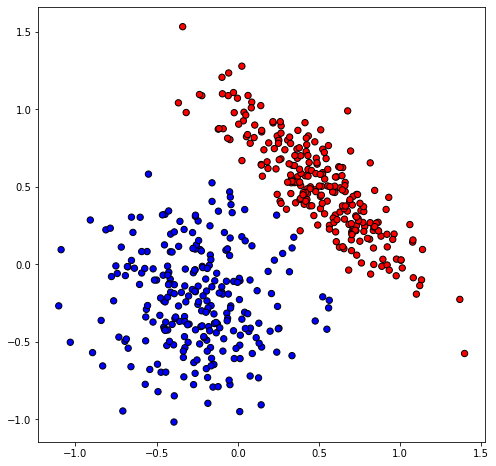

In [223]:
plt.figure(figsize=(8,8))
plot_boundaries(X,y)


In [236]:
# Naive Bayes
# priors=None, var_smoothing=1e-09
#model = GaussianNB(priors=None, var_smoothing=1e-09)
#model = GaussianNB(priors=[0.5, 0.5], var_smoothing=1e-09)
#model = GaussianNB(priors=[0.7, 0.3], var_smoothing=1e-09)
# QDA
#priors=None, reg_param=0.0, store_covariance=True
model = QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0, store_covariance=True)

In [237]:
# Entrenamiento del modelo
model.fit(X,y)

QuadraticDiscriminantAnalysis(store_covariance=True)

In [238]:
if type(model)==GaussianNB:
    print(model.classes_)
    prior1, prior2 = model.class_prior_
    sigma1, sigma2 = model.sigma_
    mu1, mu2 = model.theta_

In [239]:
if type(model)==QuadraticDiscriminantAnalysis:
    print(model.classes_)
    prior1, prior2 =  model.priors_
    mu1, mu2 = model.means_
    sigma1, sigma2 = model.covariance_


[0. 1.]


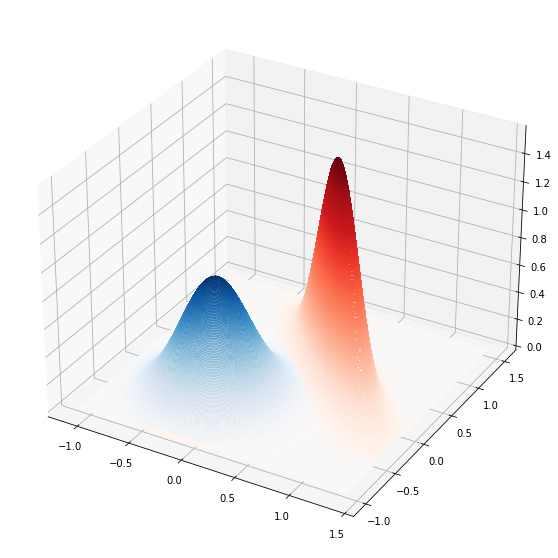

In [240]:
plot_gaussians(X, mu1, sigma1, mu2, sigma2, prior1, prior2)

In [234]:
print("Vector de medias 1: ", mu1);
print("Vector de medias 2: ", mu2);
print("Vector de sigma 1: ", sigma1);
print("Vector de sigma 2: ", sigma1);

Vector de medias 1:  [0.50016958 0.50174934]
Vector de medias 2:  [-0.24854368 -0.23132772]
Vector de sigma 1:  [0.09812204 0.09927783]
Vector de sigma 2:  [0.09812204 0.09927783]


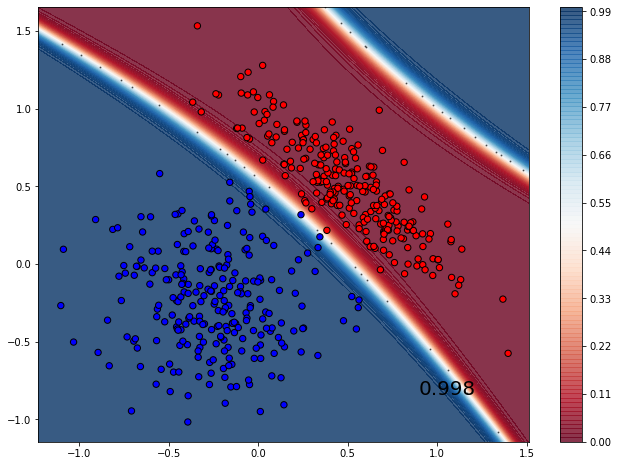

In [241]:
score = model.score(X,y)
plt.figure(figsize=(11,8))
plot_boundaries(X,y, score, probability_func=model.predict_proba, mesh_res=500)

In [244]:
Xtmp = np.array([1.25, 0.88] ).reshape(1, 2)
#  X1 = rojo
#  X2 = azul
print(model.predict_proba(Xtmp))
print(score)

[[0.08563371 0.91436629]]
0.998


[0. 1.]


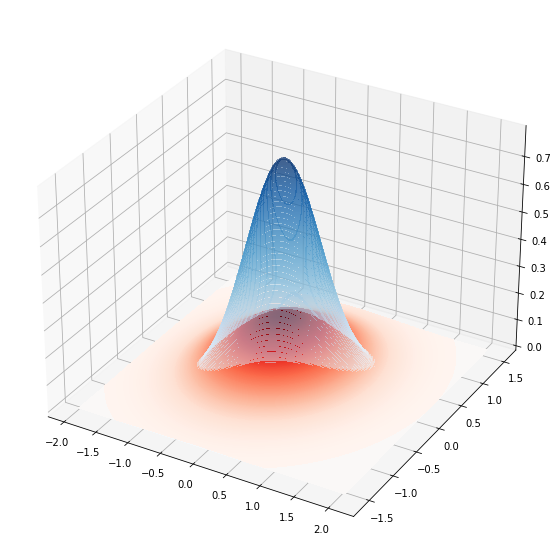

In [220]:
# a partir del modelo generado con QDA, y los datos genero la misma cantidad de datos de X e Y
X1 = np.random.multivariate_normal(mu1, sigma1, 500//2)
X2 = np.random.multivariate_normal(mu2, sigma2, 500//2)
X = np.append(X1, X2, axis=0)
y = np.append(np.zeros(500//2), np.ones(500//2))
model = QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0, store_covariance=True)
model.fit(X,y)
if type(model)==QuadraticDiscriminantAnalysis:
    print(model.classes_)
    prior1_1, prior2_1 =  model.priors_
    mu11, mu21 = model.means_
    sigma11, sigma21 = model.covariance_

plot_gaussians(X, mu11, sigma11, mu21, sigma21, prior1_1, prior2_1)



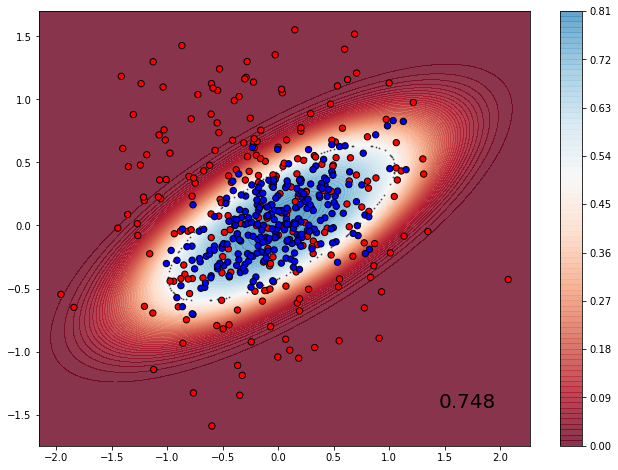

In [221]:
score = model.score(X,y)
plt.figure(figsize=(11,8))
plot_boundaries(X,y, score, probability_func=model.predict_proba, mesh_res=500)